In [42]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.units as munits

In [44]:
#  load data
df=pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)

In [45]:
# sanity check
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248389,30-nov-2024 20:00,0,0.0,0,11.6,0,10.9,10.3,12.5,91,...,2,17,2,200,,,0.0,,0,8
248390,30-nov-2024 21:00,0,0.0,0,11.4,0,10.7,10.0,12.3,91,...,2,16,2,200,,,0.0,,0,8
248391,30-nov-2024 22:00,0,0.0,0,10.9,0,10.3,9.7,12.0,92,...,2,15,2,210,,,0.0,,0,8
248392,30-nov-2024 23:00,0,0.0,0,10.8,0,10.3,9.9,12.1,94,...,2,14,2,190,,,0.0,,0,8


In [39]:
# split date and time into separate columns
df[['date', 'time']] = df['date'].str.split(' ', n=1, expand=True)

In [ ]:
# convert date column to datetime 
df["date"]=df['date'].astype('datetime64[ns]')
df['date']

0        1996-04-10
1        1996-07-31
2        1996-07-31
3        1996-07-31
4        1996-07-31
            ...    
248389   2024-11-30
248390   2024-11-30
248391   2024-11-30
248392   2024-11-30
248393   2024-12-01
Name: date, Length: 248394, dtype: datetime64[ns]

In [ ]:
# set date column as index column
df.set_index('date', inplace=True)

In [ ]:
df

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,time
date,,,,,,,,,,,,,,,,,,,,,
1996-04-10,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,...,0,0,0,25,81,0.0,35000,32,5,14:00
1996-07-31,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,...,0,0,0,25,82,0.0,40000,45,5,08:00
1996-07-31,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,...,0,0,0,80,81,0.0,8000,32,7,09:00
1996-07-31,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,...,0,0,0,25,82,0.0,28000,35,6,10:00
1996-07-31,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,...,0,0,0,2,11,0.0,40000,40,6,11:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30,0,0.0,0,11.6,0,10.9,10.3,12.5,91,1004.3,...,17,2,200,,,0.0,,0,8,20:00
2024-11-30,0,0.0,0,11.4,0,10.7,10.0,12.3,91,1004.6,...,16,2,200,,,0.0,,0,8,21:00
2024-11-30,0,0.0,0,10.9,0,10.3,9.7,12.0,92,1005.0,...,15,2,210,,,0.0,,0,8,22:00


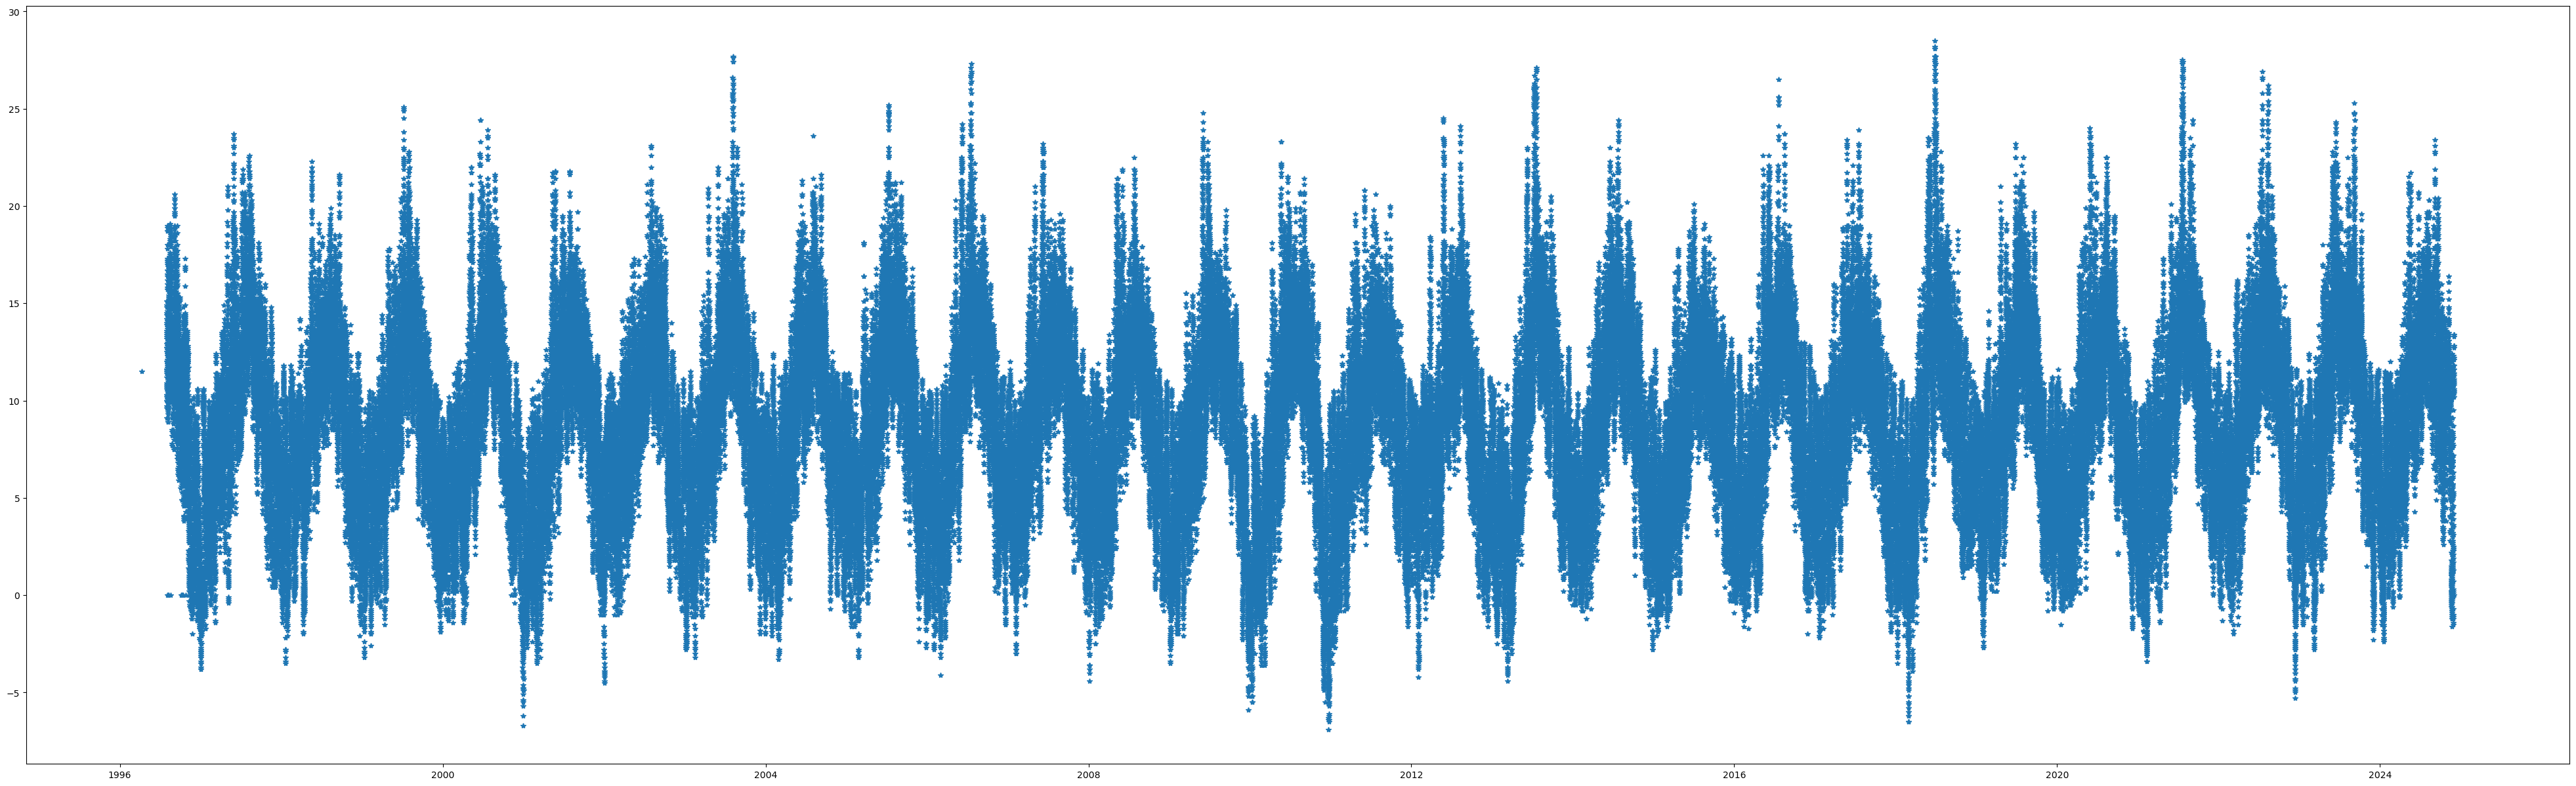

In [ ]:
# plot temperature vs date
fig, ax = plt.subplots(figsize=(50, 15))

temp=df["temp"]
temp=temp.to_numpy()

ax.plot(df.index, temp, "*")

In [ ]:
# calculate mean figures for each numerical column per day
mean_per_day=df.groupby([df.index]).mean(numeric_only =True)
# sanity check
mean_per_day

,ind,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,ind.3,ind.4,sun
date,,,,,,,,,,,
1996-04-10,0.000000,0.000000,11.500000,0.000000,8.100000,3.900000,0.000000,0.000000,0.000,0.000,0.000000
1996-07-31,0.000000,0.000000,12.650000,0.000000,10.687500,8.693750,0.000000,0.000000,0.000,0.000,0.000000
1996-08-01,0.833333,0.000000,11.666667,0.000000,10.370833,9.100000,11.108333,80.833333,2.125,2.125,0.045833
1996-08-02,0.000000,0.000000,12.504167,0.000000,11.229167,10.045833,12.308333,85.666667,2.000,2.000,4.695833
1996-08-03,0.000000,0.000000,14.266667,0.000000,12.395833,10.729167,12.904167,80.541667,2.000,2.000,0.441667
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-27,0.541667,0.083333,2.279167,0.083333,1.954167,1.470833,6.808333,94.625000,2.000,2.000,0.000000
2024-11-28,0.208333,0.250000,4.545833,0.250000,4.337500,4.020833,8.529167,96.416667,2.000,2.000,0.000000
2024-11-29,0.250000,0.000000,11.229167,0.000000,10.895833,10.566667,12.775000,95.791667,2.000,2.000,0.000000


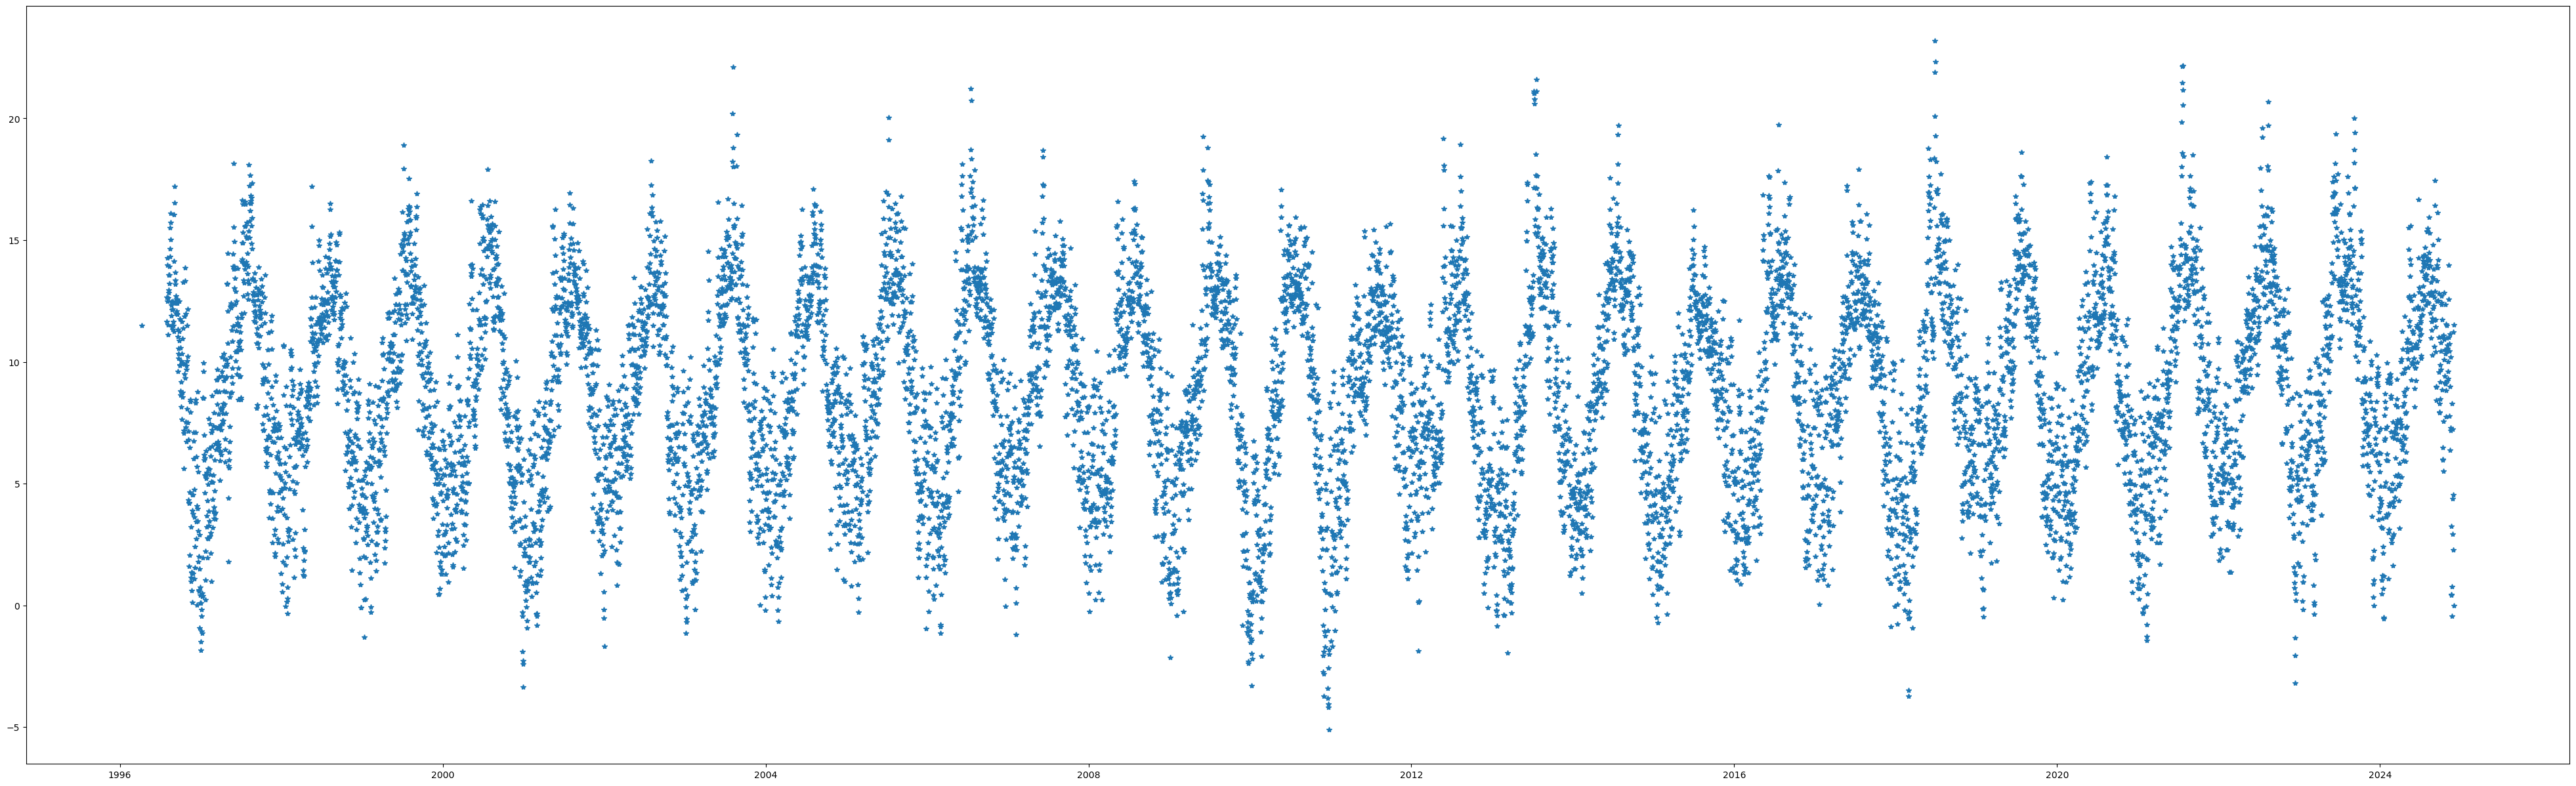

In [ ]:
# plot mean temperature vs date
fig, ax = plt.subplots(figsize=(50, 15))

temp=mean_per_day["temp"]
temp=temp.to_numpy()

ax.plot(mean_per_day.index, temp, "*")

In [ ]:
# calculate mean figures for each numerical column per month
mean_per_month=df.groupby([df.index.month]).mean(numeric_only =True)
# sanity check
mean_per_month

,ind,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,ind.3,ind.4,sun
date,,,,,,,,,,,
1,0.625816,0.078869,4.348502,0.124376,3.875562,3.146673,7.850658,92.180060,2.000672,2.001248,0.055362
2,0.540139,0.056837,4.686452,0.090603,4.065666,3.111078,7.836541,89.978350,2.004214,2.004530,0.078772
3,0.477487,0.035714,5.625178,0.061828,4.701056,3.344681,7.962486,86.257969,2.000480,2.000720,0.116979
4,0.407271,0.008581,7.519131,0.016765,6.206577,4.471202,8.583448,82.530926,1.999901,2.000099,0.167581
5,0.359975,0.001344,10.212284,0.001632,8.654263,6.891187,10.137337,81.597398,2.001152,2.001152,0.191945
6,0.317063,0.000000,12.366806,0.000000,10.838611,9.340982,11.920114,83.248413,2.000000,2.004067,0.165174
7,0.376823,0.000000,13.650432,0.000000,12.374117,11.243232,13.484118,86.458317,1.998369,1.998561,0.133384
8,0.415786,0.000000,13.561267,0.000000,12.416996,11.393108,13.620259,87.679088,2.003754,2.000417,0.174866
9,0.452059,0.000000,12.092390,0.000000,11.099416,10.134310,12.575536,88.588170,1.996216,1.995738,0.139852


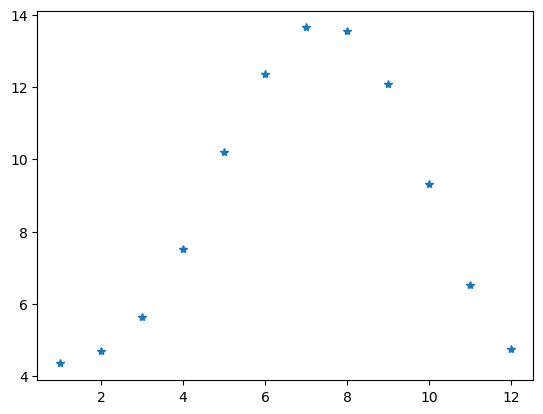

In [ ]:
# plot mean temperature vs date
fig, ax = plt.subplots()

temp=mean_per_month["temp"]
temp=temp.to_numpy()

ax.plot(mean_per_month.index, temp, "*")

In [ ]:
# clean windspeed data
#clean_wind = df["date","wdsp"]
# drop missing values from windspeed data
df["wdsp"]= df.loc[:,("wdsp")].replace(' ', np.nan)
df.dropna(inplace=True)
# convert to floats
df['wdsp']=df['wdsp'].astype(float)

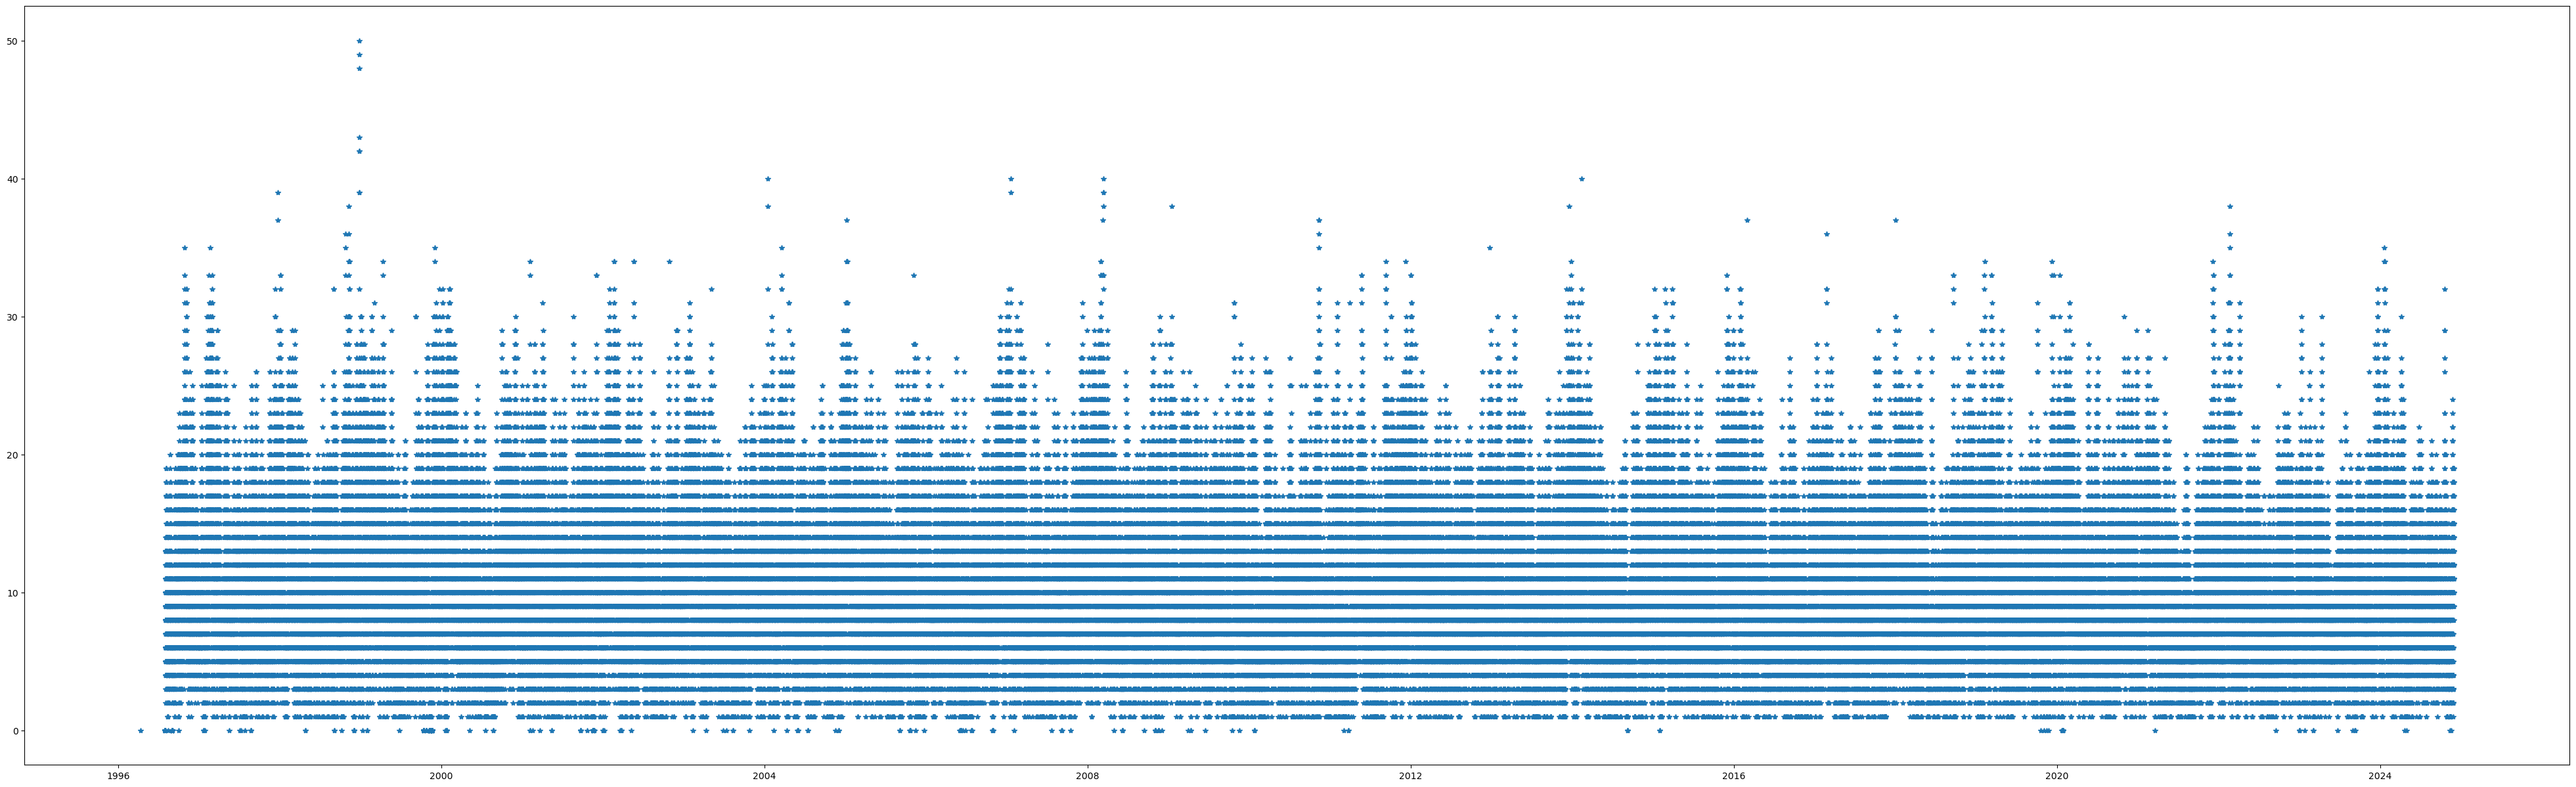

In [ ]:
# plot windspeed vs date
fig, ax = plt.subplots(figsize=(50, 15))

wdsp=df["wdsp"]
wdsp=wdsp.to_numpy()

ax.plot(df.index, wdsp, "*")

In [ ]:
full_day=df.iloc[2:26]
full_day

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,time
date,,,,,,,,,,,,,,,,,,,,,
1996-07-31,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,...,0.0,0,0,80,81,0.0,8000,32,7,09:00
1996-07-31,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,...,0.0,0,0,25,82,0.0,28000,35,6,10:00
1996-07-31,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,...,0.0,0,0,2,11,0.0,40000,40,6,11:00
1996-07-31,0,0.0,0,14.4,0,10.9,7.3,0.0,0,1010.9,...,0.0,0,0,1,82,0.0,40000,43,6,12:00
1996-07-31,0,0.0,0,14.9,0,10.9,6.7,0.0,0,1011.2,...,0.0,0,0,2,11,0.0,40000,43,5,13:00
1996-07-31,0,0.0,0,13.9,0,10.4,6.7,0.0,0,1011.3,...,0.0,0,0,2,11,0.0,50000,45,6,14:00
1996-07-31,0,0.0,0,13.2,0,10.9,8.6,0.0,0,1011.6,...,0.0,0,0,25,82,0.0,8000,45,7,15:00
1996-07-31,0,0.0,0,15.1,0,11.3,7.5,0.0,0,1011.2,...,0.0,0,0,25,82,0.0,35000,40,7,16:00
1996-07-31,0,0.0,0,11.6,0,10.6,9.6,0.0,0,1011.8,...,0.0,0,0,2,11,0.0,35000,40,7,17:00


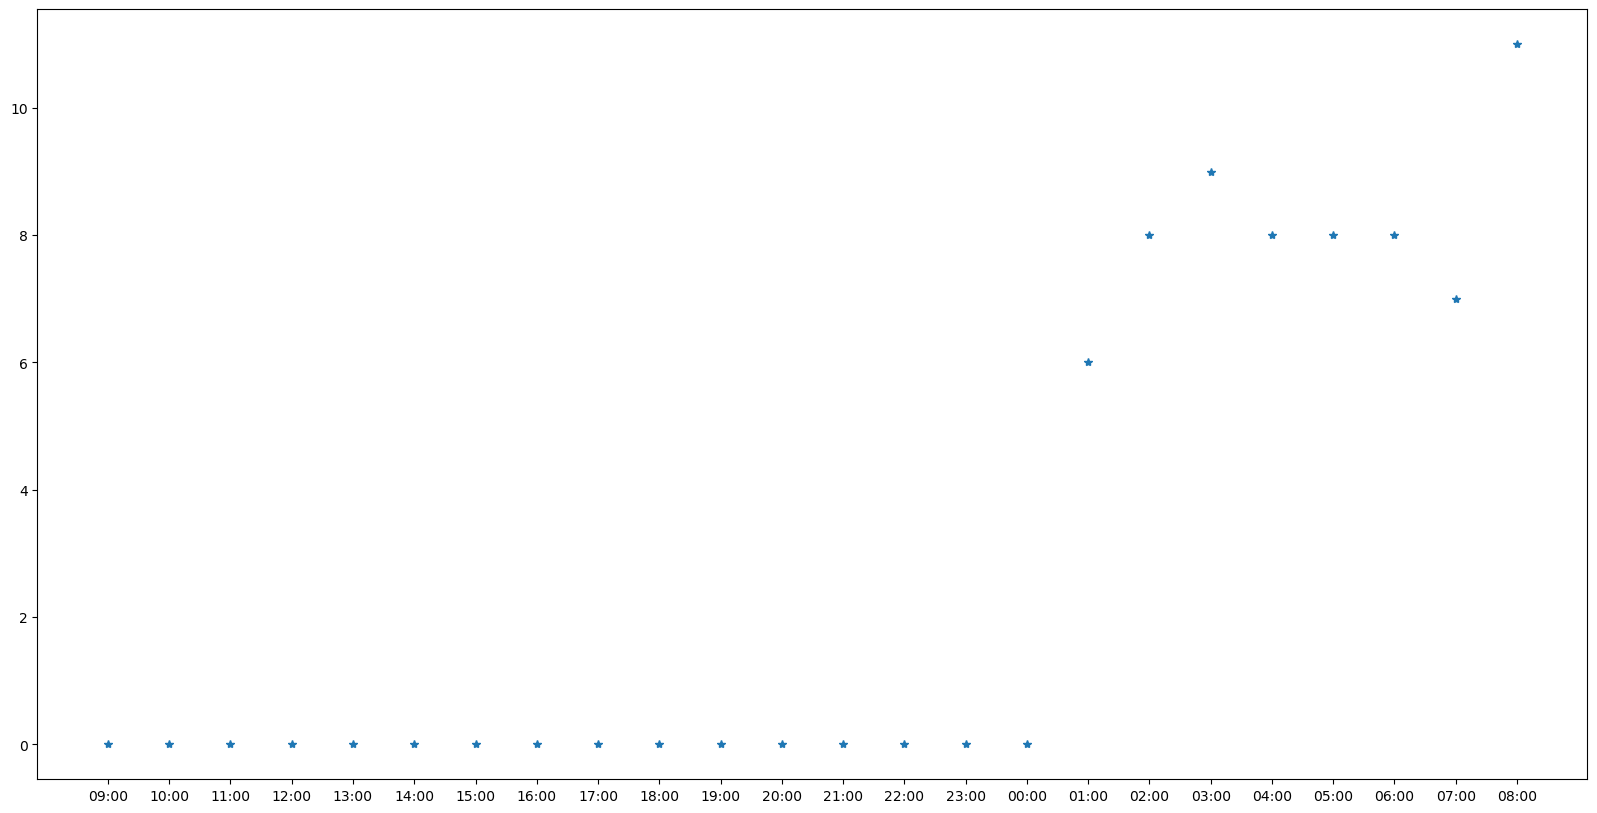

In [ ]:
# plot windspeed vs date
fig, ax = plt.subplots(figsize=(20,10))

wdsp=full_day["wdsp"]
wdsp=wdsp.to_numpy()
time=full_day["time"]
time=time.to_numpy()
ax.plot(time, wdsp, "*")

In [ ]:
# calculate max windspeed per day
max_per_day=df.groupby([df.index])['wdsp'].max()
# sanity check
max_per_day

date
1996-04-10     0.0
1996-07-31     0.0
1996-08-01    14.0
1996-08-02    13.0
1996-08-03    10.0
              ... 
2024-11-27     6.0
2024-11-28    19.0
2024-11-29    17.0
2024-11-30    19.0
2024-12-01    12.0
Name: wdsp, Length: 10352, dtype: float64

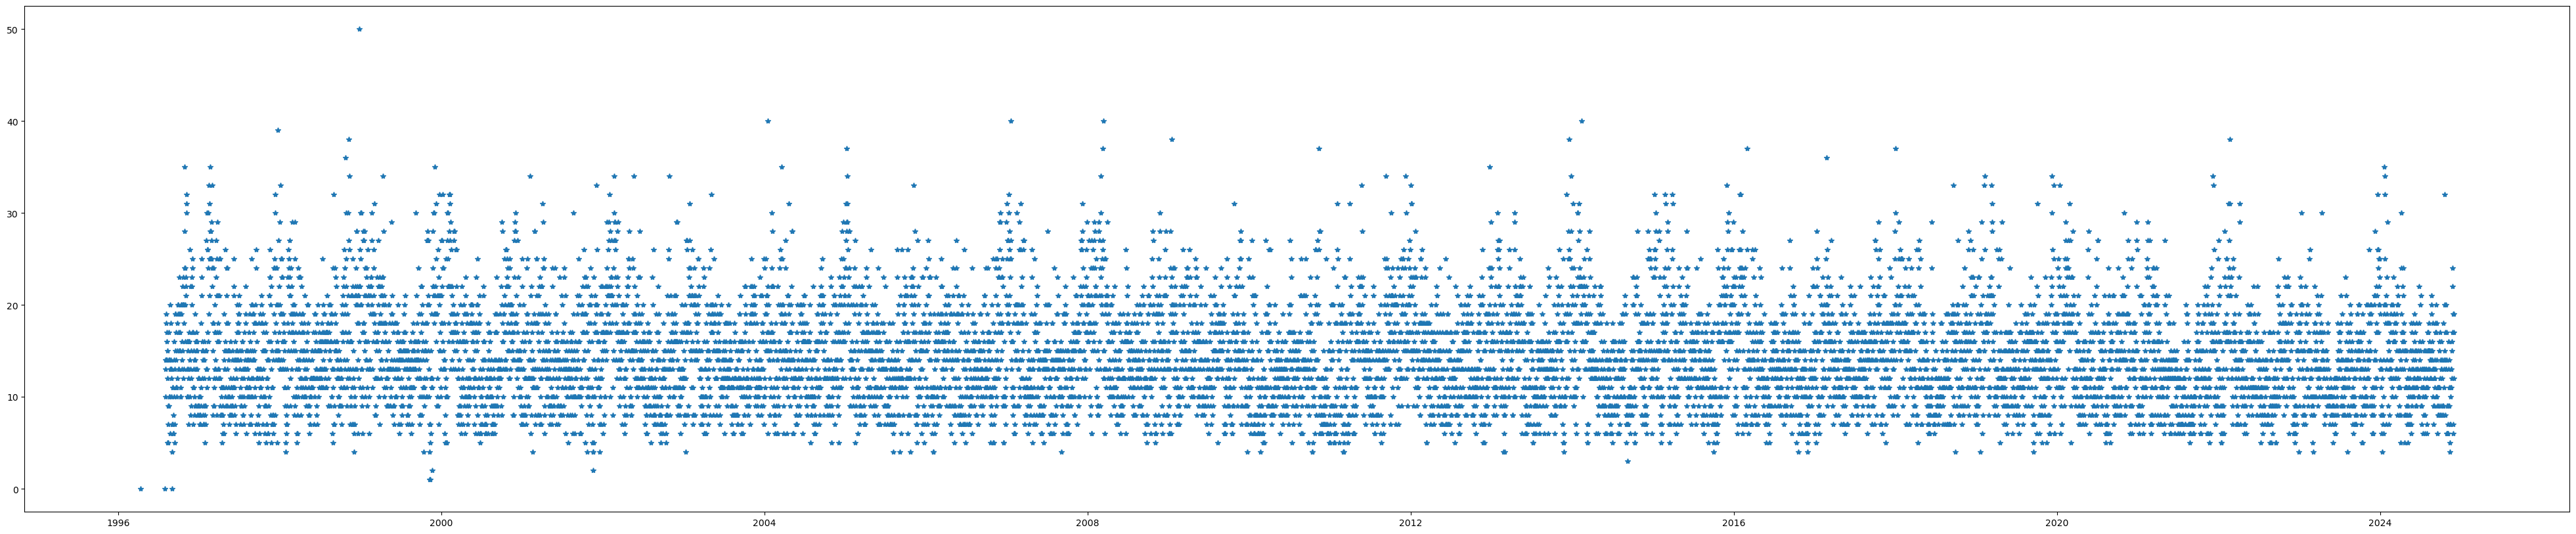

In [ ]:
# plot max windspeed vs date
fig, ax = plt.subplots(figsize=(50,10))

ax.plot(max_per_day, "*")

## References
https://www.askpython.com/python-modules/pandas/data-frame-index-for-x-axis

https://stackoverflow.com/questions/21706030/pandas-groupby-agg-function-column-dtype-error

https://stackoverflow.com/questions/37333165/plot-specific-rows-of-a-pandas-dataframe

https://stackoverflow.com/questions/72930507/pandas-calculate-max-for-every-day-per-id

https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime